In [1]:
# Main Packages
import numpy as np
import pandas as pd

# Plot
import matplotlib.pyplot as plt

# Compute Distance
from geopy import distance

# Missing Data
import missingno as msno
def count_missing(df):
    msno.matrix(df)
    plt.show()
    total = df.isna().sum().sort_values(ascending=False)
    percent = (df.isna().sum()/df.isna().count()).sort_values(ascending=False)
    missing_data_info = (pd.concat([total, percent, df.dtypes], axis=1, keys=['# of missing value', '% of missing value', 'data type']).
                            to_string(formatters={'% of missing value': '{:,.2%}'.format}))
    print(missing_data_info)
    return

# In case we want to ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing the dataset
df  = pd.read_csv('../Dataset/brazilian_ecommerce.csv')
geo = pd.read_csv("../Dataset/original/olist_geolocation_dataset.csv").drop(['geolocation_city', 'geolocation_state'], axis = 1)

In [3]:
# Compute the avg geo location given a zip code
geo = geo.groupby('geolocation_zip_code_prefix').mean()
geo = geo.reindex(np.arange(geo.index.min(), geo.index.max() + 1)).interpolate(method = 'nearest')
geo

,geolocation_lat,geolocation_lng
geolocation_zip_code_prefix,,
1001,-23.550190,-46.634024
1002,-23.548146,-46.634979
1003,-23.548994,-46.635731
1004,-23.549799,-46.634757
1005,-23.549456,-46.636733
...,...,...
99986,-28.329595,-51.769362
99987,-28.329595,-51.769362
99988,-28.329595,-51.769362


In [4]:
# Join the geo info to the table
df = pd.merge(df, geo, left_on = 'customer_zip_code_prefix', right_index = True).drop(['customer_zip_code_prefix'], axis = 1)
df = pd.merge(df, geo, left_on = 'seller_zip_code_prefix', right_index = True).drop(['seller_zip_code_prefix'], axis = 1)
df

,Unnamed: 0.1,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,...,customer_state,seller_city,seller_state,product_category_name_english,sale,is_delayed,geolocation_lat_x,geolocation_lng_x,geolocation_lat_y,geolocation_lng_y
0,0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,...,SP,maua,SP,housewares,29.99,False,-23.576983,-46.587161,-23.680729,-46.444238
1,1,1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,...,SP,maua,SP,housewares,29.99,False,-23.576983,-46.587161,-23.680729,-46.444238
2,2,2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,...,SP,maua,SP,housewares,29.99,False,-23.576983,-46.587161,-23.680729,-46.444238
3,3,3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,...,SP,maua,SP,housewares,29.99,False,-23.564630,-46.534268,-23.680729,-46.444238
4,4,4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,...,SP,maua,SP,housewares,29.99,False,-23.600462,-46.655318,-23.680729,-46.444238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86554,86554,86554,0d10abc3bc3707c914cf5197ed2eb31e,c36b6c328033cca3190e0e45ee61b010,delivered,2017-08-19 09:10:45,2017-08-19 09:25:11,2017-08-23 17:17:44,2017-09-04 20:43:47,2017-09-19,...,BA,ribeirao das neves,MG,NaN,23.50,False,-12.690130,-38.331717,-19.814427,-44.026273
86555,86555,86555,0d10abc3bc3707c914cf5197ed2eb31e,c36b6c328033cca3190e0e45ee61b010,delivered,2017-08-19 09:10:45,2017-08-19 09:25:11,2017-08-23 17:17:44,2017-09-04 20:43:47,2017-09-19,...,BA,ribeirao das neves,MG,NaN,47.00,False,-12.690130,-38.331717,-19.814427,-44.026273
86556,86556,86556,0d10abc3bc3707c914cf5197ed2eb31e,c36b6c328033cca3190e0e45ee61b010,delivered,2017-08-19 09:10:45,2017-08-19 09:25:11,2017-08-23 17:17:44,2017-09-04 20:43:47,2017-09-19,...,BA,ribeirao das neves,MG,NaN,70.50,False,-12.690130,-38.331717,-19.814427,-44.026273
86661,86661,86661,a966152e4fc6b7e1891aadd4406c7c4a,d339a723a489601e585d4f733a94bfe4,delivered,2018-04-02 21:10:31,2018-04-04 03:08:55,2018-04-11 02:32:39,2018-04-13 20:06:34,2018-04-23,...,SP,curitiba,PR,NaN,48.00,False,-23.613936,-46.678969,-25.412064,-49.356387


In [5]:
df['distance'] = df.apply(lambda x: distance.distance((x['geolocation_lat_x'], x['geolocation_lng_x']),
                                                          (x['geolocation_lat_y'], x['geolocation_lng_y'])).km, axis=1)
df = df.drop(['geolocation_lat_x', 'geolocation_lng_x', 'geolocation_lat_y', 'geolocation_lng_y'], axis = 1)
df

,Unnamed: 0.1,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,...,product_width_cm,customer_unique_id,customer_city,customer_state,seller_city,seller_state,product_category_name_english,sale,is_delayed,distance
0,0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,...,13.0,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,maua,SP,housewares,29.99,False,18.566632
1,1,1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,...,13.0,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,maua,SP,housewares,29.99,False,18.566632
2,2,2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,...,13.0,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,maua,SP,housewares,29.99,False,18.566632
3,3,3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,...,13.0,3a51803cc0d012c3b5dc8b7528cb05f7,sao paulo,SP,maua,SP,housewares,29.99,False,15.803204
4,4,4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,...,13.0,ef0996a1a279c26e7ecbd737be23d235,sao paulo,SP,maua,SP,housewares,29.99,False,23.299561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86554,86554,86554,0d10abc3bc3707c914cf5197ed2eb31e,c36b6c328033cca3190e0e45ee61b010,delivered,2017-08-19 09:10:45,2017-08-19 09:25:11,2017-08-23 17:17:44,2017-09-04 20:43:47,2017-09-19,...,11.0,c1051761919d37d096f281b050c5b5e8,camacari,BA,ribeirao das neves,MG,NaN,23.50,False,995.745465
86555,86555,86555,0d10abc3bc3707c914cf5197ed2eb31e,c36b6c328033cca3190e0e45ee61b010,delivered,2017-08-19 09:10:45,2017-08-19 09:25:11,2017-08-23 17:17:44,2017-09-04 20:43:47,2017-09-19,...,11.0,c1051761919d37d096f281b050c5b5e8,camacari,BA,ribeirao das neves,MG,NaN,47.00,False,995.745465
86556,86556,86556,0d10abc3bc3707c914cf5197ed2eb31e,c36b6c328033cca3190e0e45ee61b010,delivered,2017-08-19 09:10:45,2017-08-19 09:25:11,2017-08-23 17:17:44,2017-09-04 20:43:47,2017-09-19,...,11.0,c1051761919d37d096f281b050c5b5e8,camacari,BA,ribeirao das neves,MG,NaN,70.50,False,995.745465
86661,86661,86661,a966152e4fc6b7e1891aadd4406c7c4a,d339a723a489601e585d4f733a94bfe4,delivered,2018-04-02 21:10:31,2018-04-04 03:08:55,2018-04-11 02:32:39,2018-04-13 20:06:34,2018-04-23,...,28.0,3703c49786e40fce8e26f0537ae7c365,sao paulo,SP,curitiba,PR,NaN,48.00,False,336.575411


In [6]:
# dropping the unnecessary index columns
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

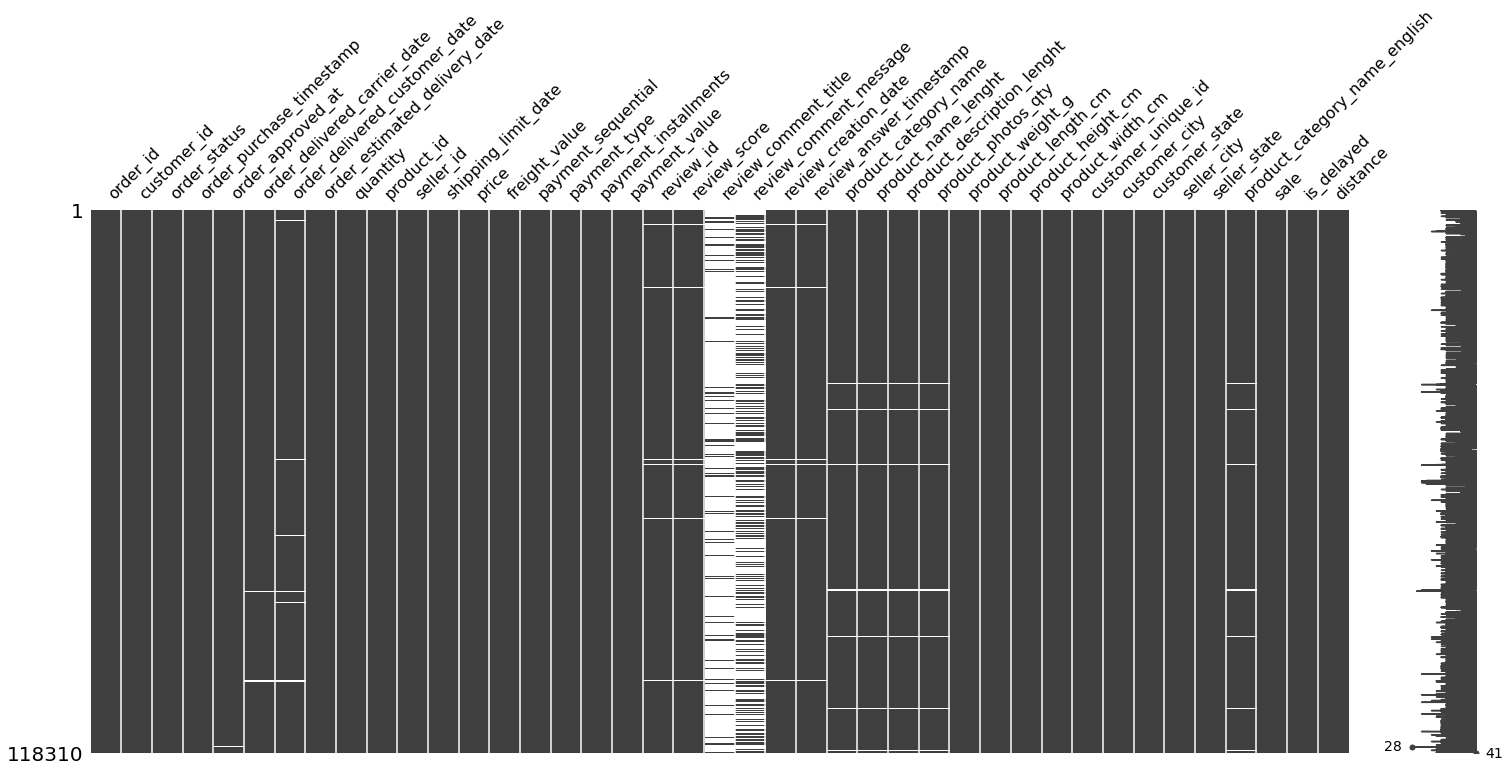

                               # of missing value % of missing value data type
review_comment_title                       104418             88.26%    object
review_comment_message                      68628             58.01%    object
order_delivered_customer_date                2588              2.19%    object
product_category_name_english                1734              1.47%    object
product_photos_qty                           1709              1.44%   float64
product_description_lenght                   1709              1.44%   float64
product_name_lenght                          1709              1.44%   float64
product_category_name                        1709              1.44%    object
order_delivered_carrier_date                 1254              1.06%    object
review_id                                     978              0.83%    object
review_answer_timestamp                       978              0.83%    object
review_creation_date                          978   

In [7]:
# checking to see the number of missing values in the data per column
df.isna().sum()
count_missing(df)

In [8]:
# finding the class distribution in our label
df['is_delayed'].value_counts()

False    109242
True       9068
Name: is_delayed, dtype: int64

The $\underline{order\_id}$, $\underline{customer\_id}$, $\underline{product\_id}$, $\underline{seller\_id}$, $\underline{review\_id}$, $\underline{customer\_unique\_id}$ are ID columns where most of the values are unique and, thus, these columns will not be able to provide the model with good insights during the training phase. Hence, it's best to do away with these ID columns.

In [9]:
df = df.drop(['order_id', 'customer_id', 'product_id', 'seller_id', 'review_id', 'customer_unique_id'], axis=1)
df

,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,quantity,shipping_limit_date,price,freight_value,...,product_height_cm,product_width_cm,customer_city,customer_state,seller_city,seller_state,product_category_name_english,sale,is_delayed,distance
0,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,2017-10-06 11:07:15,29.99,8.72,...,8.0,13.0,sao paulo,SP,maua,SP,housewares,29.99,False,18.566632
1,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,2017-10-06 11:07:15,29.99,8.72,...,8.0,13.0,sao paulo,SP,maua,SP,housewares,29.99,False,18.566632
2,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,2017-10-06 11:07:15,29.99,8.72,...,8.0,13.0,sao paulo,SP,maua,SP,housewares,29.99,False,18.566632
3,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,1.0,2017-08-21 20:05:16,29.99,7.78,...,8.0,13.0,sao paulo,SP,maua,SP,housewares,29.99,False,15.803204
4,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,1.0,2017-08-08 18:37:31,29.99,7.78,...,8.0,13.0,sao paulo,SP,maua,SP,housewares,29.99,False,23.299561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86554,delivered,2017-08-19 09:10:45,2017-08-19 09:25:11,2017-08-23 17:17:44,2017-09-04 20:43:47,2017-09-19,1.0,2017-08-24 09:25:11,23.50,15.79,...,19.0,11.0,camacari,BA,ribeirao das neves,MG,NaN,23.50,False,995.745465
86555,delivered,2017-08-19 09:10:45,2017-08-19 09:25:11,2017-08-23 17:17:44,2017-09-04 20:43:47,2017-09-19,2.0,2017-08-24 09:25:11,23.50,15.79,...,19.0,11.0,camacari,BA,ribeirao das neves,MG,NaN,47.00,False,995.745465
86556,delivered,2017-08-19 09:10:45,2017-08-19 09:25:11,2017-08-23 17:17:44,2017-09-04 20:43:47,2017-09-19,3.0,2017-08-24 09:25:11,23.50,15.79,...,19.0,11.0,camacari,BA,ribeirao das neves,MG,NaN,70.50,False,995.745465
86661,delivered,2018-04-02 21:10:31,2018-04-04 03:08:55,2018-04-11 02:32:39,2018-04-13 20:06:34,2018-04-23,1.0,2018-04-10 03:08:55,48.00,17.93,...,12.0,28.0,sao paulo,SP,curitiba,PR,NaN,48.00,False,336.575411


As seen before, inorder to determine whether the delivery of the product is late or not (the $\underline{is\_delayed}$ label), we take the difference between $\underline{'order\_delivered\_customer\_date'}$ and $\underline{'order\_estimated\_delivery\_date'}$. Therefore, we will get rid of all the timestamps since they don't contribute to our prediction.

In [10]:
df = df.drop(['order_estimated_delivery_date', 'order_delivered_customer_date', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'shipping_limit_date', 'review_creation_date'], axis = 1)
df

,order_status,quantity,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,review_comment_title,...,product_height_cm,product_width_cm,customer_city,customer_state,seller_city,seller_state,product_category_name_english,sale,is_delayed,distance
0,delivered,1.0,29.99,8.72,1.0,credit_card,1.0,18.12,4.0,NaN,...,8.0,13.0,sao paulo,SP,maua,SP,housewares,29.99,False,18.566632
1,delivered,1.0,29.99,8.72,3.0,voucher,1.0,2.00,4.0,NaN,...,8.0,13.0,sao paulo,SP,maua,SP,housewares,29.99,False,18.566632
2,delivered,1.0,29.99,8.72,2.0,voucher,1.0,18.59,4.0,NaN,...,8.0,13.0,sao paulo,SP,maua,SP,housewares,29.99,False,18.566632
3,delivered,1.0,29.99,7.78,1.0,credit_card,3.0,37.77,4.0,NaN,...,8.0,13.0,sao paulo,SP,maua,SP,housewares,29.99,False,15.803204
4,delivered,1.0,29.99,7.78,1.0,credit_card,1.0,37.77,5.0,NaN,...,8.0,13.0,sao paulo,SP,maua,SP,housewares,29.99,False,23.299561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86554,delivered,1.0,23.50,15.79,1.0,credit_card,1.0,117.87,5.0,NaN,...,19.0,11.0,camacari,BA,ribeirao das neves,MG,NaN,23.50,False,995.745465
86555,delivered,2.0,23.50,15.79,1.0,credit_card,1.0,117.87,5.0,NaN,...,19.0,11.0,camacari,BA,ribeirao das neves,MG,NaN,47.00,False,995.745465
86556,delivered,3.0,23.50,15.79,1.0,credit_card,1.0,117.87,5.0,NaN,...,19.0,11.0,camacari,BA,ribeirao das neves,MG,NaN,70.50,False,995.745465
86661,delivered,1.0,48.00,17.93,1.0,boleto,1.0,65.93,2.0,NaN,...,12.0,28.0,sao paulo,SP,curitiba,PR,NaN,48.00,False,336.575411


In [11]:
# (df['order_estimated_delivery_date'] - df['order_delivered_customer_date']).describe()

In [12]:
print('{:.2f}%'.format(df['review_comment_message'].isna().sum()/len(df)*100))

58.01%


Since we have ~ 58% missing $\underline{review\_comment\_message}$ data, it doesn't make sense to impute the review comment messages since:
 1. We'll have to use NLP for this which is beyond the scope of our project.
 2. Even if we decide to use NLP, we have very little data to work with.
 3. Further, because of the aforementioned reason, we'll be feeding the model with wrong information in the form of imputed comment messages which may adversely affect the accuracy of the model.
 
Also, it does not make sense to remove the 58% of the rows with missing values since it will lead to massive information loss.
Hence, we will drop this column. Since, the other 2 columns ($\underline{'review\_comment\_title'}$ and $\underline{'review\_answer\_timestamp'}$) are also directly correlated to review_comment_message, we will be dropping them as well. Since, 'review_score' is highly correlated to the label, we will keep it as is.

In [13]:
df = df.drop(['review_comment_title', 'review_comment_message', 'review_answer_timestamp'], axis=1)
df

,order_status,quantity,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,product_category_name,...,product_height_cm,product_width_cm,customer_city,customer_state,seller_city,seller_state,product_category_name_english,sale,is_delayed,distance
0,delivered,1.0,29.99,8.72,1.0,credit_card,1.0,18.12,4.0,utilidades_domesticas,...,8.0,13.0,sao paulo,SP,maua,SP,housewares,29.99,False,18.566632
1,delivered,1.0,29.99,8.72,3.0,voucher,1.0,2.00,4.0,utilidades_domesticas,...,8.0,13.0,sao paulo,SP,maua,SP,housewares,29.99,False,18.566632
2,delivered,1.0,29.99,8.72,2.0,voucher,1.0,18.59,4.0,utilidades_domesticas,...,8.0,13.0,sao paulo,SP,maua,SP,housewares,29.99,False,18.566632
3,delivered,1.0,29.99,7.78,1.0,credit_card,3.0,37.77,4.0,utilidades_domesticas,...,8.0,13.0,sao paulo,SP,maua,SP,housewares,29.99,False,15.803204
4,delivered,1.0,29.99,7.78,1.0,credit_card,1.0,37.77,5.0,utilidades_domesticas,...,8.0,13.0,sao paulo,SP,maua,SP,housewares,29.99,False,23.299561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86554,delivered,1.0,23.50,15.79,1.0,credit_card,1.0,117.87,5.0,NaN,...,19.0,11.0,camacari,BA,ribeirao das neves,MG,NaN,23.50,False,995.745465
86555,delivered,2.0,23.50,15.79,1.0,credit_card,1.0,117.87,5.0,NaN,...,19.0,11.0,camacari,BA,ribeirao das neves,MG,NaN,47.00,False,995.745465
86556,delivered,3.0,23.50,15.79,1.0,credit_card,1.0,117.87,5.0,NaN,...,19.0,11.0,camacari,BA,ribeirao das neves,MG,NaN,70.50,False,995.745465
86661,delivered,1.0,48.00,17.93,1.0,boleto,1.0,65.93,2.0,NaN,...,12.0,28.0,sao paulo,SP,curitiba,PR,NaN,48.00,False,336.575411


There is very high correlation between two columns namely 'product_category_name' and 'product_category_name_english' since they are the same thing but in two different languages. So, we will get rid of $\underline{'product\_category\_name\_english'}$.

In [14]:
df = df.drop(['product_category_name_english'], axis=1)
df

,order_status,quantity,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,product_category_name,...,product_length_cm,product_height_cm,product_width_cm,customer_city,customer_state,seller_city,seller_state,sale,is_delayed,distance
0,delivered,1.0,29.99,8.72,1.0,credit_card,1.0,18.12,4.0,utilidades_domesticas,...,19.0,8.0,13.0,sao paulo,SP,maua,SP,29.99,False,18.566632
1,delivered,1.0,29.99,8.72,3.0,voucher,1.0,2.00,4.0,utilidades_domesticas,...,19.0,8.0,13.0,sao paulo,SP,maua,SP,29.99,False,18.566632
2,delivered,1.0,29.99,8.72,2.0,voucher,1.0,18.59,4.0,utilidades_domesticas,...,19.0,8.0,13.0,sao paulo,SP,maua,SP,29.99,False,18.566632
3,delivered,1.0,29.99,7.78,1.0,credit_card,3.0,37.77,4.0,utilidades_domesticas,...,19.0,8.0,13.0,sao paulo,SP,maua,SP,29.99,False,15.803204
4,delivered,1.0,29.99,7.78,1.0,credit_card,1.0,37.77,5.0,utilidades_domesticas,...,19.0,8.0,13.0,sao paulo,SP,maua,SP,29.99,False,23.299561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86554,delivered,1.0,23.50,15.79,1.0,credit_card,1.0,117.87,5.0,NaN,...,16.0,19.0,11.0,camacari,BA,ribeirao das neves,MG,23.50,False,995.745465
86555,delivered,2.0,23.50,15.79,1.0,credit_card,1.0,117.87,5.0,NaN,...,16.0,19.0,11.0,camacari,BA,ribeirao das neves,MG,47.00,False,995.745465
86556,delivered,3.0,23.50,15.79,1.0,credit_card,1.0,117.87,5.0,NaN,...,16.0,19.0,11.0,camacari,BA,ribeirao das neves,MG,70.50,False,995.745465
86661,delivered,1.0,48.00,17.93,1.0,boleto,1.0,65.93,2.0,NaN,...,28.0,12.0,28.0,sao paulo,SP,curitiba,PR,48.00,False,336.575411


We have seen through the scatter-plots that the product dimensions don't have much impact on our label. However, product delays could be attributed to the volume of the package. Bulkier the package, its transportation time may be expected to be large. For this reason, we're calculating the volume of the package and storing it as another attribute in the dataframe to give our model additional data to work with. We'll let the model decide which features are important in the training phase.

In [15]:
# calculating the volume of the product using the formula [Volume of cuboid = length*width*height]
df['product_volume_cm'] = df['product_length_cm'] * df['product_height_cm'] * df['product_width_cm']
df = df.drop(['product_length_cm', 'product_height_cm', 'product_width_cm'], axis = 1)
df

,order_status,quantity,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,product_category_name,...,product_photos_qty,product_weight_g,customer_city,customer_state,seller_city,seller_state,sale,is_delayed,distance,product_volume_cm
0,delivered,1.0,29.99,8.72,1.0,credit_card,1.0,18.12,4.0,utilidades_domesticas,...,4.0,500.0,sao paulo,SP,maua,SP,29.99,False,18.566632,1976.0
1,delivered,1.0,29.99,8.72,3.0,voucher,1.0,2.00,4.0,utilidades_domesticas,...,4.0,500.0,sao paulo,SP,maua,SP,29.99,False,18.566632,1976.0
2,delivered,1.0,29.99,8.72,2.0,voucher,1.0,18.59,4.0,utilidades_domesticas,...,4.0,500.0,sao paulo,SP,maua,SP,29.99,False,18.566632,1976.0
3,delivered,1.0,29.99,7.78,1.0,credit_card,3.0,37.77,4.0,utilidades_domesticas,...,4.0,500.0,sao paulo,SP,maua,SP,29.99,False,15.803204,1976.0
4,delivered,1.0,29.99,7.78,1.0,credit_card,1.0,37.77,5.0,utilidades_domesticas,...,4.0,500.0,sao paulo,SP,maua,SP,29.99,False,23.299561,1976.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86554,delivered,1.0,23.50,15.79,1.0,credit_card,1.0,117.87,5.0,NaN,...,NaN,200.0,camacari,BA,ribeirao das neves,MG,23.50,False,995.745465,3344.0
86555,delivered,2.0,23.50,15.79,1.0,credit_card,1.0,117.87,5.0,NaN,...,NaN,200.0,camacari,BA,ribeirao das neves,MG,47.00,False,995.745465,3344.0
86556,delivered,3.0,23.50,15.79,1.0,credit_card,1.0,117.87,5.0,NaN,...,NaN,200.0,camacari,BA,ribeirao das neves,MG,70.50,False,995.745465,3344.0
86661,delivered,1.0,48.00,17.93,1.0,boleto,1.0,65.93,2.0,NaN,...,NaN,1350.0,sao paulo,SP,curitiba,PR,48.00,False,336.575411,9408.0


Since there are very few missing values for all attributes (maximum being 3240 for order_delivered_customer_date), we'll drop these rows. Dropping such a miniscule number of rows will have negligible effect on the quality of the data or our predictions.

In [16]:
# dropping remaining missing values from the dataframe
df = df.dropna()
df

,order_status,quantity,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,product_category_name,...,product_photos_qty,product_weight_g,customer_city,customer_state,seller_city,seller_state,sale,is_delayed,distance,product_volume_cm
0,delivered,1.0,29.99,8.72,1.0,credit_card,1.0,18.12,4.0,utilidades_domesticas,...,4.0,500.0,sao paulo,SP,maua,SP,29.99,False,18.566632,1976.0
1,delivered,1.0,29.99,8.72,3.0,voucher,1.0,2.00,4.0,utilidades_domesticas,...,4.0,500.0,sao paulo,SP,maua,SP,29.99,False,18.566632,1976.0
2,delivered,1.0,29.99,8.72,2.0,voucher,1.0,18.59,4.0,utilidades_domesticas,...,4.0,500.0,sao paulo,SP,maua,SP,29.99,False,18.566632,1976.0
3,delivered,1.0,29.99,7.78,1.0,credit_card,3.0,37.77,4.0,utilidades_domesticas,...,4.0,500.0,sao paulo,SP,maua,SP,29.99,False,15.803204,1976.0
4,delivered,1.0,29.99,7.78,1.0,credit_card,1.0,37.77,5.0,utilidades_domesticas,...,4.0,500.0,sao paulo,SP,maua,SP,29.99,False,23.299561,1976.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58067,delivered,1.0,334.99,24.92,1.0,credit_card,6.0,359.91,5.0,automotivo,...,4.0,2150.0,taubate,SP,castro pires,MG,334.99,False,715.137598,29792.0
58145,delivered,1.0,87.90,17.55,1.0,credit_card,10.0,105.45,5.0,automotivo,...,4.0,550.0,goiania,GO,rio de janeiro,RJ,87.90,False,932.695602,4320.0
113151,delivered,1.0,199.99,19.28,1.0,credit_card,1.0,219.27,5.0,malas_acessorios,...,4.0,5250.0,sao jose de uba,RJ,sao paulo,SP,199.99,False,534.171562,31280.0
94397,delivered,1.0,19.45,15.56,1.0,credit_card,7.0,70.02,5.0,ferramentas_jardim,...,1.0,900.0,sao domingos do prata,MG,sao paulo,SP,19.45,False,552.760816,2418.0


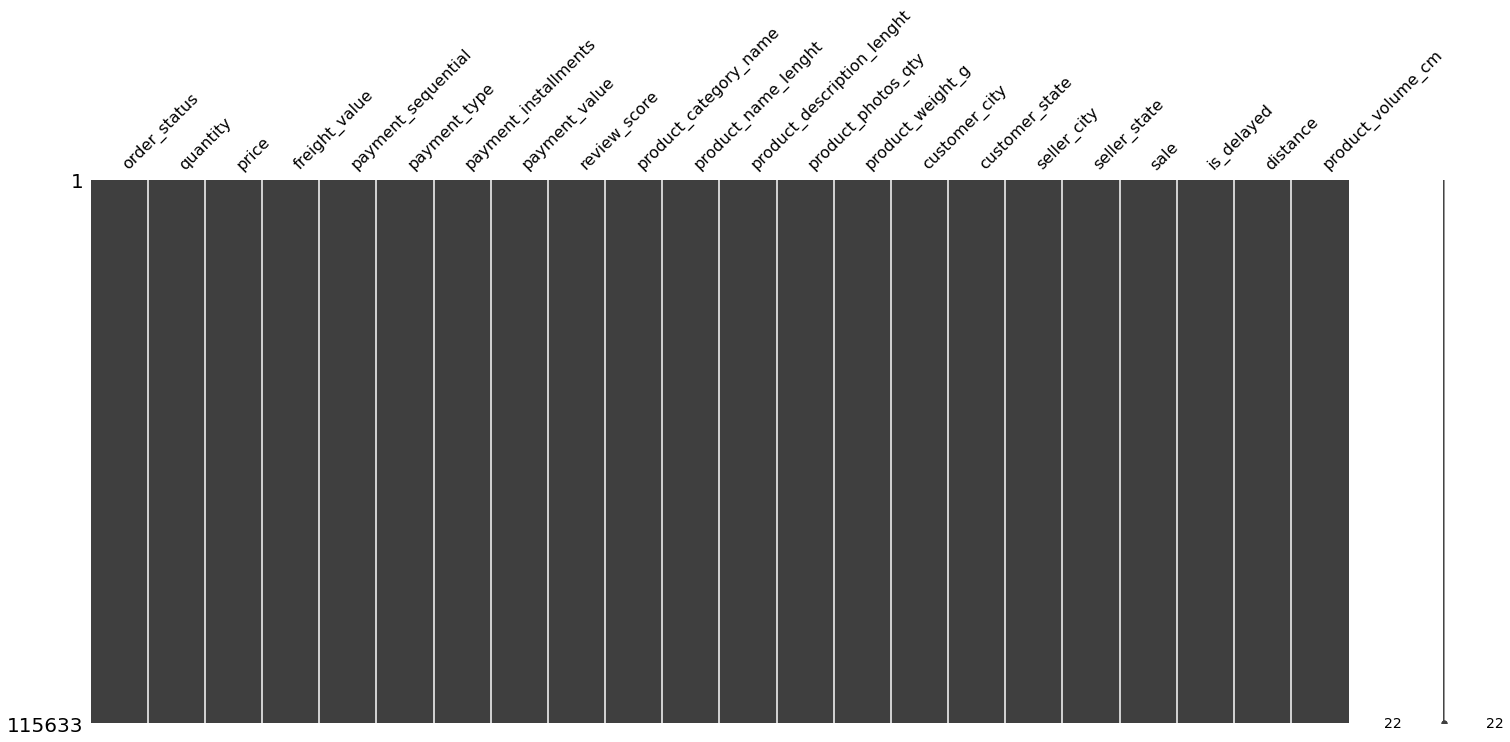

                            # of missing value % of missing value data type
order_status                                 0              0.00%    object
quantity                                     0              0.00%   float64
distance                                     0              0.00%   float64
is_delayed                                   0              0.00%      bool
sale                                         0              0.00%   float64
seller_state                                 0              0.00%    object
seller_city                                  0              0.00%    object
customer_state                               0              0.00%    object
customer_city                                0              0.00%    object
product_weight_g                             0              0.00%   float64
product_photos_qty                           0              0.00%   float64
product_description_lenght                   0              0.00%   float64
product_name

In [17]:
# dertermining if there are any missing values still left
df.isna().sum()
count_missing(df)

In [18]:
# storing the cleaned dataset
df.to_csv('brazilian_ecommerce_cleaned.csv', index=False)